# Sub-sampling the data of a `toffee` file to just include standard peptides

In order to build a set of test files with known properties that can be used within a testing framework, we wish to take a full experimental file and extract out a subset of the data. In this example, we are going to take a HEK293 control that has a collection of spike-in retention time standards, extract the data just for those peptides such that this file can be used in regression tests.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import scipy
import scipy.sparse
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

import toffee
from toffee import util
from toffee.manipulation import Subsampler

sns.set()
sns.set_color_codes()

In [3]:
toffee.__version__

'0.12.18'

## Sub-sample using the Spectral Reference Library (SRL)

Open the transition library for the iRT peptides

In [4]:
base_dir = os.environ.get('DIA_TEST_DATA_REPO', None)
assert base_dir is not None
srl_fname = base_dir + '/ProCan90/srl/hek_srl.OpenSwath.iRT.tsv'
srl = pd.read_csv(srl_fname, sep='\t')

and then create the object for sub-sampling a `toffee` file using the peptides in teh reference library.

In [5]:
tof_fname = base_dir + '/ProCan90/tof/ProCan90-M03-01.tof'
subsampler = Subsampler(
    tof_fname=tof_fname,
    precursor_and_product_df=srl,
    filter_ms2_windows=['ms2-025', 'ms2-041'],
)

Running the sub-sampling is as simple as passing in the output file name.

In [6]:
test_tof_fname = os.path.basename(tof_fname).replace('.tof', '.test.tof')
subsampler.run(test_tof_fname)

100%|██████████| 2/2 [00:25<00:00, 11.43s/it]


## Properties of the `toffee` HDF5 file

Using standard HDF tools we can interrogate the new `toffee` file for things such as compression, dataset and attribute names, or even the Intrinsic Mass Spacing parameters.

In [7]:
!ls -lhF $test_tof_fname

-rw-r--r--  1 btully  470603294   867K 15 Apr 20:43 ProCan90-M03-01.test.tof


In [8]:
!h5ls -vg $test_tof_fname/ms1

Opened "ProCan90-M03-01.test.tof" with sec2 driver.
ms1                      Group
    Attribute: IMSAlpha scalar
        Type:      native double
        Data:  7.01548e-05
    Attribute: IMSBeta scalar
        Type:      native double
        Data:  -5.92871e-05
    Attribute: IMSGamma scalar
        Type:      native int
        Data:  266664
    Attribute: firstScanRetentionTimeOffset scalar
        Type:      native double
        Data:  0.17
    Attribute: precursorCenter scalar
        Type:      native double
        Data:  -1
    Attribute: precursorLower scalar
        Type:      native double
        Data:  -1
    Attribute: precursorUpper scalar
        Type:      native double
        Data:  -1
    Attribute: scanCycleTime scalar
        Type:      native double
        Data:  3.32
    Location:  1:405261
    Links:     1


In [9]:
!h5ls -v $test_tof_fname/ms1

Opened "ProCan90-M03-01.test.tof" with sec2 driver.
IMSAlphaPerScan          Dataset {1627/1627}
    Location:  1:413217
    Links:     1
    Chunks:    {1627} 13016 bytes
    Storage:   13016 logical bytes, 6975 allocated bytes, 186.61% utilization
    Filter-0:  deflate-1 OPT {6}
    Type:      native double
IMSBetaPerScan           Dataset {1627/1627}
    Location:  1:422560
    Links:     1
    Chunks:    {1627} 13016 bytes
    Storage:   13016 logical bytes, 7470 allocated bytes, 174.24% utilization
    Filter-0:  deflate-1 OPT {6}
    Type:      native double
imsCoord                 Dataset {257400/257400}
    Location:  1:432398
    Links:     1
    Chunks:    {257400} 1029600 bytes
    Storage:   1029600 logical bytes, 198728 allocated bytes, 518.10% utilization
    Filter-0:  deflate-1 OPT {6}
    Type:      native unsigned int
intensity                Dataset {257400/257400}
    Location:  1:633670
    Links:     1
    Chunks:    {257400} 1029600 bytes
    Storage:   1029600

In [10]:
!h5ls -vg $test_tof_fname/ms2-041

Opened "ProCan90-M03-01.test.tof" with sec2 driver.
ms2-041                  Group
    Attribute: IMSAlpha scalar
        Type:      native double
        Data:  7.01547e-05
    Attribute: IMSBeta scalar
        Type:      native double
        Data:  -3.32516e-05
    Attribute: IMSGamma scalar
        Type:      native int
        Data:  142548
    Attribute: firstScanRetentionTimeOffset scalar
        Type:      native double
        Data:  1.467
    Attribute: precursorCenter scalar
        Type:      native double
        Data:  611.5
    Attribute: precursorLower scalar
        Type:      native double
        Data:  608.5
    Attribute: precursorUpper scalar
        Type:      native double
        Data:  614.5
    Attribute: scanCycleTime scalar
        Type:      native double
        Data:  3.32
    Location:  1:174499
    Links:     1


In [11]:
!h5ls -v $test_tof_fname/ms2-041

Opened "ProCan90-M03-01.test.tof" with sec2 driver.
IMSAlphaPerScan          Dataset {1627/1627}
    Location:  1:181206
    Links:     1
    Chunks:    {1627} 13016 bytes
    Storage:   13016 logical bytes, 8244 allocated bytes, 157.88% utilization
    Filter-0:  deflate-1 OPT {6}
    Type:      native double
IMSBetaPerScan           Dataset {1627/1627}
    Location:  1:191818
    Links:     1
    Chunks:    {1627} 13016 bytes
    Storage:   13016 logical bytes, 4755 allocated bytes, 273.73% utilization
    Filter-0:  deflate-1 OPT {6}
    Type:      native double
imsCoord                 Dataset {96051/96051}
    Location:  1:198941
    Links:     1
    Chunks:    {96051} 384204 bytes
    Storage:   384204 logical bytes, 172435 allocated bytes, 222.81% utilization
    Filter-0:  deflate-1 OPT {6}
    Type:      native unsigned int
intensity                Dataset {96051/96051}
    Location:  1:373920
    Links:     1
    Chunks:    {96051} 384204 bytes
    Storage:   384204 logical b

## Compare to the original data

By opening up the file we just created, we can ensure that the data it contains matches exactly the same data as the original file. In doing so, we can prove that the data used in testing later is indistiguisable regardless of which file is being used.

First off, we need a series of functions that check data inside numpy and scipy matrices.

In [12]:
def sparse_assert_allclose(A, B, atol=1e-8):
    """
    Test to see if two sparse matrices compare equal.
    Modified from: https://stackoverflow.com/a/47771340/758811
    """
    np.testing.assert_array_equal(A.shape, B.shape)
    r1, c1, v1 = scipy.sparse.find(A)
    r2, c2, v2 = scipy.sparse.find(B)
    np.testing.assert_array_equal(r1, r2)
    np.testing.assert_array_equal(c1, c2)
    np.testing.assert_allclose(v1, v2, atol=atol)
    
def chromatogram_assert_allclose(A, B):
    np.testing.assert_allclose(
        A.retentionTime, 
        B.retentionTime
    )
    np.testing.assert_allclose(
        A.massOverCharge, 
        B.massOverCharge
    )
    sparse_assert_allclose(
        A.intensities, 
        B.intensities
    )

For further checking, we can plot the raw data of each file alongside one another

In [13]:
def plot_raw(original_chrom, test_chrom, mz_value, window):
    def _plot_raw_impl(chrom, ax1, ax2, title, label_y=True):
        xlim = [chrom.retentionTime[0] / 60.0, chrom.retentionTime[-1] / 60.0]
        dense_intensities = chrom.intensities.toarray()

        intensities = np.log10(1 + dense_intensities.T)
        ax1.matshow(intensities, extent=xlim + [0, 6.0], cmap=plt.cm.viridis)
        ax1.set_xlim(xlim)
        ax1.set_ylabel('m/z (Da)')
        ax1.yaxis.set_visible(False)
        ax1.set_title(title, y=0.9)

        ax2.plot(chrom.retentionTime / 60.0, np.sum(dense_intensities, axis=1))
        ax2.set_xlim(xlim)
        ax2.set_xlabel('Retention Time (min)')
        if label_y:
            ax2.set_ylabel('Intensity')
        
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 3), sharex=True, sharey='row')
    _plot_raw_impl(original_chrom, axes[0, 0], axes[1, 0], 'Original Data')
    _plot_raw_impl(test_chrom, axes[0, 1], axes[1, 1], 'Test Data', label_y=False)
    fig.suptitle('{} Data | Mass Over Charge = {:.2F}'.format(window, mz_value))
    fig.tight_layout()
    plt.show()

Again, loading the MS1 data is more expensive than others, so we only want to do it once

In [14]:
test_swath_run = toffee.SwathRun(test_tof_fname)
test_ms1_swath_map = test_swath_run.loadSwathMap(toffee.ToffeeWriter.MS1_NAME)

Finally, let's loop through the precursors and products that were used by the sub-samplerand compare the new file to the existing data

  0%|          | 0/2 [00:00<?, ?it/s]

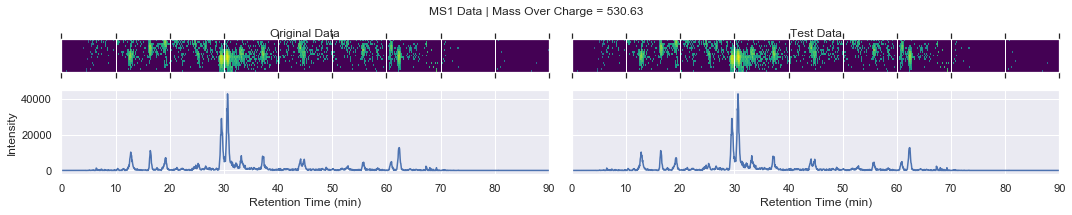

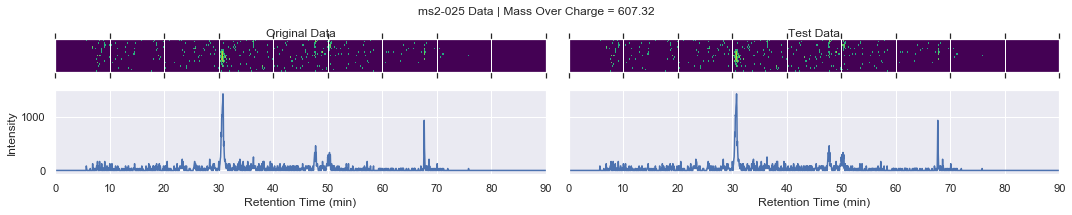

 50%|█████     | 1/2 [00:01<00:01,  1.96s/it]

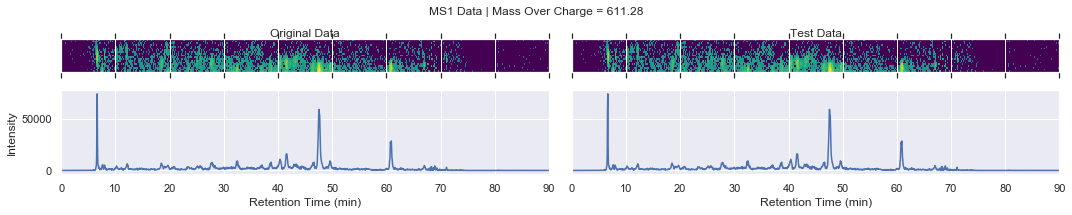

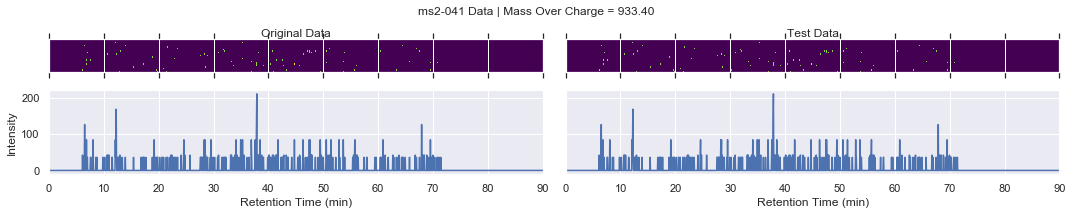

100%|██████████| 2/2 [00:03<00:00,  1.82s/it]


In [15]:
ppm_width = 100
for k, ms2_name in enumerate(tqdm(sorted(subsampler.precursors.ms2Name.unique().tolist()))):
    # filter the library
    try:
        precursors = subsampler.precursors[subsampler.precursors.ms2Name == ms2_name]
        products = subsampler.products[subsampler.products.ms2Name == ms2_name]
    except KeyError:
        # this will happen if the window is not in the library
        continue

    # load the MS2 swath map
    ms2_swath_map = subsampler.swath_run.loadSwathMap(ms2_name)
    test_ms2_swath_map = test_swath_run.loadSwathMap(ms2_name)
    
    # collect the MS1 data
    for i, (_, row) in enumerate(precursors.iterrows()):
        mz = row.IsotopeMz
        mz_range = toffee.MassOverChargeRangeWithPPMFullWidth(mz, ppm_width)
        ms1_xic = subsampler.ms1_swath_map.extractedIonChromatogramSparse(mz_range)
        test_ms1_xic = test_ms1_swath_map.extractedIonChromatogramSparse(mz_range)
        if i == 0 and k < 4:
            plot_raw(ms1_xic, test_ms1_xic, mz, window='MS1')
        try:
            chromatogram_assert_allclose(ms1_xic, test_ms1_xic)
        except AssertionError:
            plot_raw(ms1_xic, test_ms1_xic, mz, window=f'Error! MS1')

    # collect the MS2 data
    for i, (_, row) in enumerate(products.iterrows()):
        mz = row.IsotopeMz
        mz_range = toffee.MassOverChargeRangeWithPPMFullWidth(mz, ppm_width)
        ms2_xic = ms2_swath_map.extractedIonChromatogramSparse(mz_range)
        test_ms2_xic = test_ms2_swath_map.extractedIonChromatogramSparse(mz_range)
        if i == 0 and k < 4:
            plot_raw(ms2_xic, test_ms2_xic, mz, window=ms2_name)
        try:
            chromatogram_assert_allclose(ms2_xic, test_ms2_xic)
        except AssertionError:
            plot_raw(ms2_xic, test_ms2_xic, mz, window=f'Error! {ms2_name}')

And now, clean up

In [16]:
if os.path.isfile(test_tof_fname):
    os.remove(test_tof_fname)